In [1]:
import sqlite3
import pandas as pd


conn = sqlite3.connect("meteortite_landing.db")
cursor= conn.cursor()

df = pd.read_csv("Meteorite_Landings_20250223.csv")
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [2]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS meteorites (
    id INTEGER PRIMARY KEY,
    name TEXT,
    nametype TEXT,
    recclass TEXT,
    mass_g REAL,
    fall TEXT,
    year INTEGER,
    reclat REAL,
    reclong REAL
);
""")

conn.commit()

df.to_sql("meteorites", conn, if_exists="replace", index=False) 

conn.close() 

In [5]:
conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT * FROM meteorites WHERE "mass (g)" IS NULL OR reclat IS NULL OR reclong IS NULL;
'''

df = pd.read_sql(query,conn);
conn.close()
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769.0,50.66667,2.33333,"(50.66667, 2.33333)"
1,Angers,2301,Valid,L6,NaN,Fell,1822.0,47.46667,-0.55000,"(47.46667, -0.55)"
2,Barcelona (stone),4944,Valid,OC,NaN,Fell,1704.0,41.36667,2.16667,"(41.36667, 2.16667)"
3,Belville,5009,Valid,OC,NaN,Fell,1937.0,-32.33333,-64.86667,"(-32.33333, -64.86667)"
4,Bulls Run,5163,Valid,Iron?,2250.000,Fell,1964.0,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...
7429,Yamato 981090,37712,Valid,H4,8.682,Found,1998.0,NaN,NaN,None
7430,Yamato 984028,40648,Valid,Martian (shergottite),12.342,Found,1998.0,NaN,NaN,None
7431,Yambo no. 2,30346,Valid,L3,3.200,Found,1975.0,NaN,NaN,None
7432,Zacatecas (1969),30382,Valid,"Iron, IIIAB",6660.000,Found,1969.0,NaN,NaN,None


In [3]:
import sqlite3

conn = sqlite3.connect("meteortite_landing.db")

query = '''
DELETE FROM meteorites WHERE "mass (g)" IS NULL OR reclat IS NULL OR reclong IS NULL;
'''

conn.execute(query)
conn.commit()
conn.close()


In [5]:
import pandas as pd
conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT * FROM meteorites WHERE "mass (g)" IS NULL OR reclat IS NULL OR reclong IS NULL;
'''

df = pd.read_sql(query,conn);
conn.close()
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation


In [7]:
conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT * FROM meteorites;
'''

df = pd.read_sql(query,conn);
conn.close()
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
38277,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
38278,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
38279,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
38280,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [14]:
conn = sqlite3.connect("meteortite_landing.db")

df = df.drop(columns=["GeoLocation"], errors="ignore")
df.to_sql("meteorites", conn, if_exists="replace", index=False)

conn.close()


In [15]:
conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT * FROM meteorites;
'''

df = pd.read_sql(query,conn);
conn.close()
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...
38277,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850
38278,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667
38279,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667
38280,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460


In [18]:
conn = sqlite3.connect("meteortite_landing.db")

df['year'] = df['year'].apply(lambda x: int(x) if pd.notnull(x) else None) 

df.to_sql("meteorites", conn, if_exists="replace", index=False)
conn.close()


In [17]:
conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT * FROM meteorites;
'''

df = pd.read_sql(query,conn);
conn.close()
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...
38277,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850
38278,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667
38279,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667
38280,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460


In [19]:
print(df['year'].dtype)

float64


In [20]:
df['year'] = df['year'].fillna(0).astype('Int64') 


In [21]:
print(df['year'].dtype)

Int64


In [22]:
conn = sqlite3.connect("meteortite_landing.db")
df.to_sql("meteorites", conn, if_exists="replace", index=False)
conn.close()

In [23]:
conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT * FROM meteorites;
'''

df = pd.read_sql(query,conn);
conn.close()
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...
38277,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990,29.03700,17.01850
38278,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999,13.78333,8.96667
38279,Zlin,30410,Valid,H4,3.3,Found,1939,49.25000,17.66667
38280,Zubkovsky,31357,Valid,L6,2167.0,Found,2003,49.78917,41.50460


In [26]:
conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT name, "mass (g)" FROM meteorites ORDER BY "mass (g)" DESC LIMIT 10;
'''

df = pd.read_sql(query,conn);
conn.close()
df

,name,mass (g)
0,Hoba,60000000.0
1,Cape York,58200000.0
2,Campo del Cielo,50000000.0
3,Canyon Diablo,30000000.0
4,Armanty,28000000.0
5,Gibeon,26000000.0
6,Chupaderos,24300000.0
7,Mundrabilla,24000000.0
8,Sikhote-Alin,23000000.0
9,Bacubirito,22000000.0


In [27]:
conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT DISTINCT recclass FROM meteorites;
'''

df = pd.read_sql(query,conn);
conn.close()
df

,recclass
0,L5
1,H6
2,EH4
3,Acapulcoite
4,L6
...,...
419,R3.9
420,C1/2-ung
421,L/LL
422,CM


In [29]:
conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT recclass, COUNT(*) FROM meteorites GROUP BY recclass ORDER BY COUNT(*) ASC;
'''

df = pd.read_sql(query,conn);
conn.close()
df

,recclass,COUNT(*)
0,C1/2-ung,1
1,C2,1
2,C3.0-ung,1
3,C4/5,1
4,C5/6-ung,1
...,...,...
419,L5,3296
420,H4,3892
421,H6,3903
422,H5,6269


In [33]:
conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT name, recclass, year FROM meteorites WHERE year > 2000 ORDER BY year ASC;
'''

df = pd.read_sql(query,conn);
conn.close()
df

,name,recclass,year
0,Al Zarnkh,LL5,2001
1,Beni M'hira,L6,2001
2,Bukhara,CV3,2001
3,Dergaon,H5,2001
4,Devgaon,H3.8,2001
...,...,...,...
11898,Northwest Africa 7858,H4,2013
11899,Northwest Africa 7861,L5,2013
11900,Northwest Africa 7862,L4/5,2013
11901,Northwest Africa 7863,LL5,2013


In [36]:
conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT AVG("mass (g)") AS avg_mass FROM meteorites;
'''

df = pd.read_sql(query,conn);
conn.close()
df

,avg_mass
0,15580.977962


In [5]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT year, COUNT(*) FROM meteorites GROUP BY year ORDER BY COUNT(*) DESC;
'''

df = pd.read_sql(query,conn);
conn.close()
df

,year,COUNT(*)
0,1979,3045
1,1988,2295
2,1998,2147
3,2003,1754
4,2006,1616
...,...,...
249,1575,1
250,1491,1
251,1490,1
252,1399,1


In [6]:
conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT name, reclat, reclong FROM meteorites 
WHERE reclat BETWEEN 24.3 AND 49.3 AND reclong BETWEEN -125 AND -66.9;
'''

df = pd.read_sql(query,conn);
conn.close()
df

,name,reclat,reclong
0,Allegan,42.53333,-85.88333
1,Allende,26.96667,-105.31667
2,Andover,44.61667,-70.75000
3,Archie,38.50000,-94.30000
4,Ash Creek,31.80500,-97.01000
...,...,...,...
1724,Yucca 017,34.81923,-114.27735
1725,Zaffra,35.00000,-94.75000
1726,Zapaliname,25.00944,-100.75000
1727,Zenda,42.51333,-88.48944


In [21]:
conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT name, "mass (g)", year,
CASE
    WHEN "mass (g)" <100 THEN 'small'
    WHEN "mass (g)" BETWEEN 100 AND 10000 THEN 'medium'
    WHEN "mass (g)" BETWEEN 10000 AND 100000 THEN 'large'
    ELSE 'massive'
END AS 'Size_Category'
FROM meteorites
WHERE Size_Category='massive';
'''

df = pd.read_sql(query,conn);
conn.close()
df

,name,mass (g),year,Size_Category
0,Abee,107000.0,1952,massive
1,Alfianello,228000.0,1883,massive
2,Allende,2000000.0,1969,massive
3,Bjurböle,330000.0,1899,massive
4,Boguslavka,256000.0,1916,massive
...,...,...,...,...
265,Zacatecas (1792),1000000.0,1792,massive
266,Zaragoza,162000.0,0,massive
267,Zerhamra,630000.0,1967,massive
268,Zhaoping,2000000.0,1983,massive


In [22]:

conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT year, COUNT(*) AS count 
FROM meteorites 
WHERE year IS NOT NULL
GROUP BY year
ORDER BY count DESC
LIMIT 10;
'''

df = pd.read_sql(query,conn);
conn.close()
df

,year,count
0,1979,3045
1,1988,2295
2,1998,2147
3,2003,1754
4,2006,1616
5,1999,1592
6,1990,1506
7,1997,1505
8,2000,1502
9,2009,1496


In [26]:
conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT year, COUNT(*) AS count,
CASE
    WHEN "mass (g)" <100 THEN 'small'
    WHEN "mass (g)" BETWEEN 100 AND 10000 THEN 'medium'
    WHEN "mass (g)" BETWEEN 10000 AND 100000 THEN 'large'
    ELSE 'massive'
END AS 'Size_Category'
FROM meteorites
WHERE Size_Category='massive' AND year >0
GROUP BY year
ORDER BY count DESC
LIMIT 10;
'''

df = pd.read_sql(query,conn);
conn.close()
df

,year,count,Size_Category
0,2000,6,massive
1,1937,6,massive
2,1967,5,massive
3,1890,5,massive
4,1992,4,massive
5,1918,4,massive
6,1917,4,massive
7,1903,4,massive
8,1884,4,massive
9,1995,3,massive


In [54]:
conn = sqlite3.connect("meteortite_landing.db")

query = '''
SELECT 
   COUNT(*) AS count,
    CASE 
        WHEN reclat BETWEEN -35 AND 37.3 AND reclong BETWEEN 17.5 AND 51.4 THEN 'Africa'
        WHEN reclat BETWEEN -55 AND 12.5 AND reclong BETWEEN -81.7 AND -34.8 THEN 'South America'
        WHEN reclat BETWEEN 7.2 AND 83.1 AND reclong BETWEEN -168.1 AND -52.6 THEN 'North America'
        WHEN reclat BETWEEN 34.6 AND 71.2 AND reclong BETWEEN -31.3 AND 69 THEN 'Europe'
        WHEN reclat BETWEEN -55.1 AND -9.1 AND reclong BETWEEN 112.9 AND 179.9 THEN 'Australia'
        WHEN reclat BETWEEN -10 AND 81 AND reclong BETWEEN 25 AND 180 THEN 'Asia'
        ELSE 'Unknown'
    END AS region
FROM meteorites
GROUP BY region
ORDER BY count DESC;
'''

df = pd.read_sql(query,conn);
conn.close()
df

,count,region
0,30764,Unknown
1,3552,Asia
2,1819,North America
3,646,Australia
4,542,Europe
5,539,South America
6,420,Africa


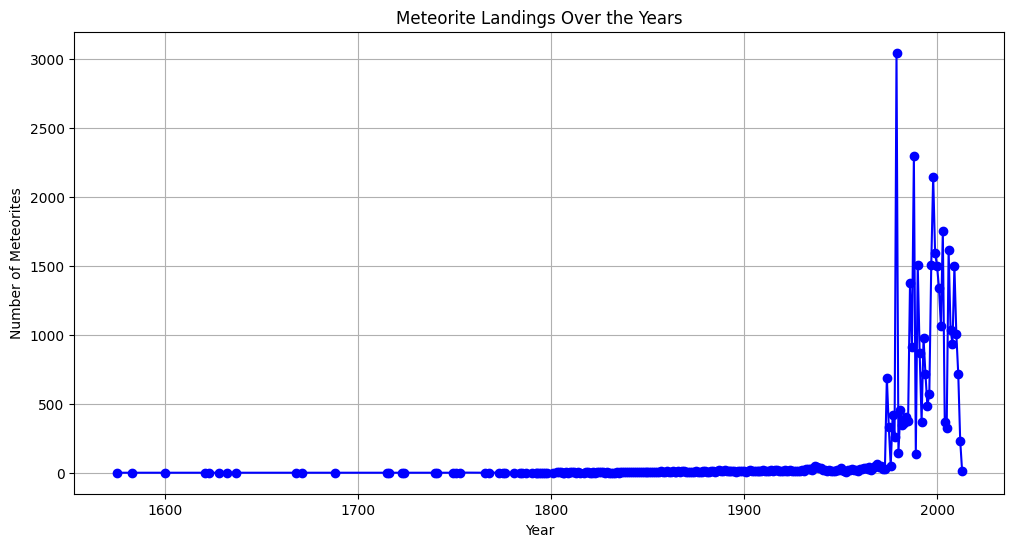

In [41]:
import matplotlib.pyplot as plt
conn = sqlite3.connect("meteortite_landing.db")

df_yearly = pd.read_sql("SELECT year, COUNT(*) as count FROM meteorites WHERE year >1500 AND year <2025 GROUP BY year ORDER BY year;", conn)

plt.figure(figsize=(12,6))
plt.plot(df_yearly['year'], df_yearly['count'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Meteorites')
plt.title('Meteorite Landings Over the Years')
plt.grid(True)
plt.show()
conn.close()

In [51]:
import folium

conn = sqlite3.connect("meteortite_landing.db")

df_geo = pd.read_sql("SELECT name, reclat, reclong FROM meteorites WHERE reclat IS NOT NULL AND reclong IS NOT NULL LIMIT 500;", conn)

m = folium.Map(location=[0, 0], zoom_start=2)

for index, row in df_geo.iterrows():
    folium.Marker([row['reclat'], row['reclong']], popup=row['name']).add_to(m)

m.save("meteorite_map.html")
conn.close()

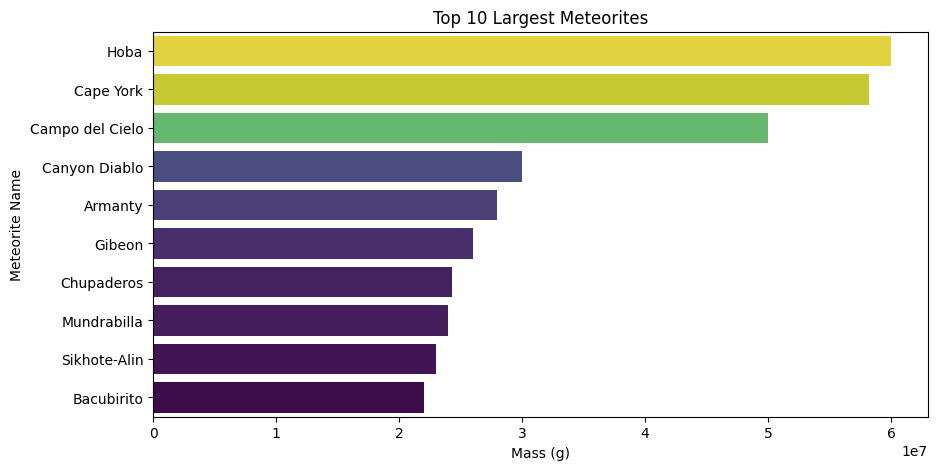

In [62]:
conn = sqlite3.connect("meteortite_landing.db")

query1 = """
SELECT name, "mass (g)" AS Mass
FROM meteorites
WHERE Mass IS NOT NULL
ORDER BY Mass DESC
LIMIT 10;
"""
largest_meteorites = pd.read_sql_query(query1, conn)

conn.close()

plt.figure(figsize=(10, 5))
sns.barplot(y=largest_meteorites["name"], x=largest_meteorites["Mass"], hue = largest_meteorites["Mass"],palette="viridis", legend=False)
plt.xlabel("Mass (g)")
plt.ylabel("Meteorite Name")
plt.title("Top 10 Largest Meteorites")
plt.show()


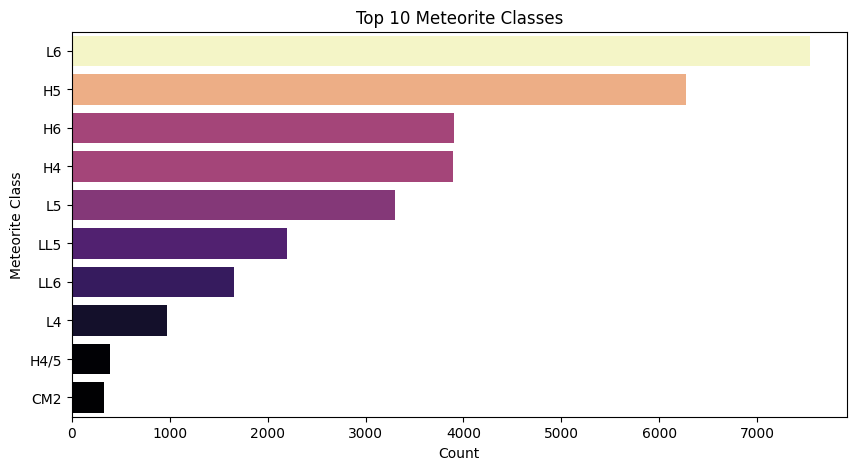

In [63]:
conn = sqlite3.connect("meteortite_landing.db")

query = """
SELECT recclass, COUNT(*) AS count
FROM meteorites
GROUP BY recclass
ORDER BY count DESC
LIMIT 10;
"""
top_classes = pd.read_sql_query(query, conn)
conn.close()

plt.figure(figsize=(10, 5))
sns.barplot(y=top_classes["recclass"], x=top_classes["count"], hue = top_classes["count"],palette="magma", legend=False)
plt.xlabel("Count")
plt.ylabel("Meteorite Class")
plt.title("Top 10 Meteorite Classes")
plt.show()

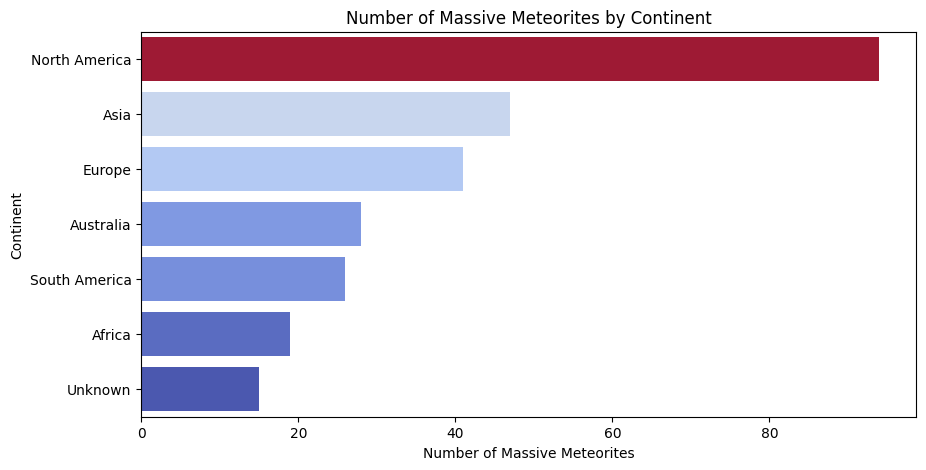

In [68]:
conn = sqlite3.connect("meteortite_landing.db")

query = """
SELECT 
   COUNT(*) AS count,
    CASE 
        WHEN reclat BETWEEN -35 AND 37.3 AND reclong BETWEEN 17.5 AND 51.4 THEN 'Africa'
        WHEN reclat BETWEEN -55 AND 12.5 AND reclong BETWEEN -81.7 AND -34.8 THEN 'South America'
        WHEN reclat BETWEEN 7.2 AND 83.1 AND reclong BETWEEN -168.1 AND -52.6 THEN 'North America'
        WHEN reclat BETWEEN 34.6 AND 71.2 AND reclong BETWEEN -31.3 AND 69 THEN 'Europe'
        WHEN reclat BETWEEN -55.1 AND -9.1 AND reclong BETWEEN 112.9 AND 179.9 THEN 'Australia'
        WHEN reclat BETWEEN -10 AND 81 AND reclong BETWEEN 25 AND 180 THEN 'Asia'
        ELSE 'Unknown'
    END AS region
FROM meteorites
WHERE "mass (g)" > 100000
GROUP BY region
ORDER BY count DESC;
"""
massive_meteorites = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 5))
sns.barplot(y=massive_meteorites["region"], x=massive_meteorites["count"], hue = massive_meteorites["count"], palette="coolwarm", legend = False)
plt.xlabel("Number of Massive Meteorites")
plt.ylabel("Continent")
plt.title("Number of Massive Meteorites by Continent")
plt.show()